<h2 align="center" style="color:red">SALES ANALYSIS</h2>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Merging all the csv files in one csv file 

In [2]:
# Set the directory where your CSV files are located
directory = 'D:\data_analyst\python_pandas_project'

# List to store DataFrames
dfs = []

# Loop through all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        # Read each CSV file into a DataFrame
        df = pd.read_csv(file_path)
        dfs.append(df)

# Concatenate all DataFrames
merged_df = pd.concat(dfs)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_file.csv')


In [3]:
df=pd.read_csv("merged_file.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address'],
      dtype='object')

In [5]:
df=merged_df[['Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address']]

## data cleaning

In [6]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
df['Order ID'].isnull().sum()

545

In [8]:
df[df['Order ID'].isnull()].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
df.duplicated().sum()

618

In [12]:
df=df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(185687, 6)

In [15]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185687,185687,185687,185687,185687,185687
unique,178438,20,10,24,142396,140788
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21859,168291,21859,8,9


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185687 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


## Data Understanding and data engineearing

In [17]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [18]:
df["month"]=df["Order Date"].str[0:2]

In [19]:
df["month"].unique()

array(['04', '05', 'Or', '08', '09', '12', '01', '02', '03', '07', '06',
       '11', '10'], dtype=object)

In [20]:
df[df["Order Date"].str[0:2]=="Or"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [21]:
df=df[df["month"].str[0:2]!="Or"]

In [22]:
df["month"]=df["month"].astype("int32")

In [23]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [24]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


## EDA

Question 1: What was the best month for sales? How much was earned that month?</br>
Question 2: What city sold the most product?</br>
Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?</br>
Question 4: What products are most often sold together?</br>
Question 5: What product sold the most? Why do you think it sold the most?

In [25]:
# 1)What was the best month for sales? How much was earned that month?

df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)


In [26]:
df['Quantity Ordered']=df['Quantity Ordered'].astype('int')
df['Price Each']=df['Price Each'].astype('float')

In [27]:
df['Sales']=df['Quantity Ordered']*df['Price Each']

In [29]:
df.groupby(['month']).sum()

C:\Users\jyoti\AppData\Local\Temp\ipykernel_8180\2685944665.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['month']).sum()


,Quantity Ordered,Price Each,Sales
month,,,
1,10893,1810924.81,1821413.16
2,13431,2186940.38,2200078.08
3,16979,2789084.64,2804973.35
4,20536,3366218.76,3389217.98
5,18653,3133134.61,3150616.23
6,15234,2560503.50,2576280.15
7,16054,2631225.12,2646461.32
8,13429,2226963.90,2241083.37
9,13091,2081897.65,2094465.69


range(1, 13)


C:\Users\jyoti\AppData\Local\Temp\ipykernel_8180\918871104.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(months,df.groupby(['month']).sum()['Sales'])


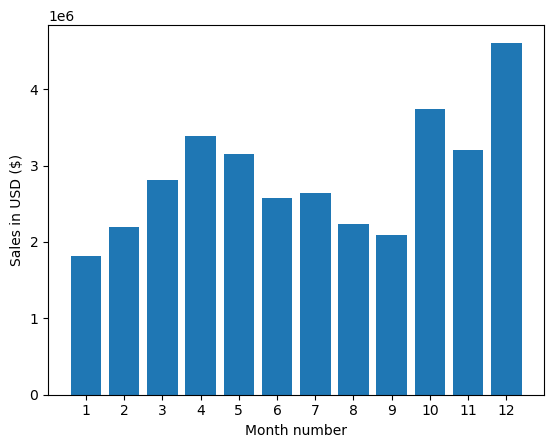

In [32]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,df.groupby(['month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()



In [33]:
# 2) What city sold the most product?

In [34]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month', 'City', 'Sales'],
      dtype='object')

In [35]:
df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')

In [36]:
df.groupby(['City']).sum()

C:\Users\jyoti\AppData\Local\Temp\ipykernel_8180\3968765854.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['City']).sum()


,Quantity Ordered,Price Each,month,Sales
City,,,,
Atlanta (GA),16584,2778608.69,104649,2794199.07
Austin (TX),11137,1808340.03,69720,1818044.33
Boston (MA),22494,3634398.40,140898,3658627.65
Dallas (TX),16707,2750026.38,104447,2765373.96
Los Angeles (CA),33247,5417171.70,208020,5448304.28
New York City (NY),27903,4632920.54,175557,4661867.14
Portland (ME),2746,446752.36,17119,449321.38
Portland (OR),11291,1859836.44,70517,1870010.56
San Francisco (CA),50169,8204001.38,314949,8254743.55


C:\Users\jyoti\AppData\Local\Temp\ipykernel_8180\2962408349.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [city for city, df in df.groupby(['City'])]
C:\Users\jyoti\AppData\Local\Temp\ipykernel_8180\2962408349.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(keys,df.groupby(['City']).sum()['Sales'])


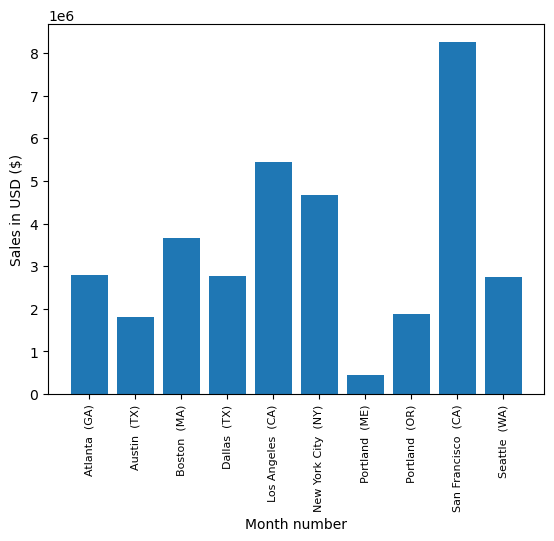

In [37]:
import matplotlib.pyplot as plt

keys = [city for city, df in df.groupby(['City'])]

plt.bar(keys,df.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [38]:
#What time should we display advertisements to maximize likelihood of customer's buying product?

In [39]:
# Add hour column
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['Count'] = 1
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


C:\Users\jyoti\AppData\Local\Temp\ipykernel_8180\2058389145.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [pair for pair, df in df.groupby(['Hour'])]


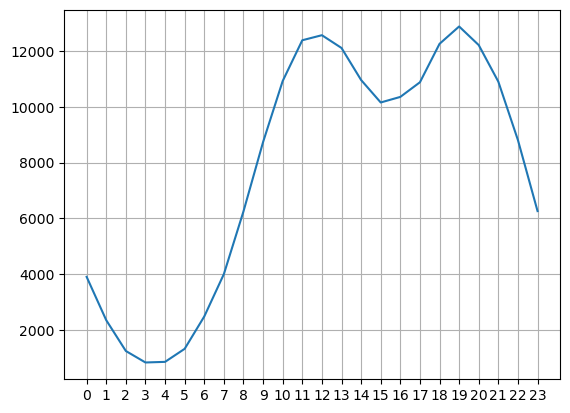

In [40]:
keys = [pair for pair, df in df.groupby(['Hour'])]

plt.plot(keys, df.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

In [41]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = df[df['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [42]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [43]:
#What product sold the most? Why do you think it sold the most?

C:\Users\jyoti\AppData\Local\Temp\ipykernel_8180\3204111952.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


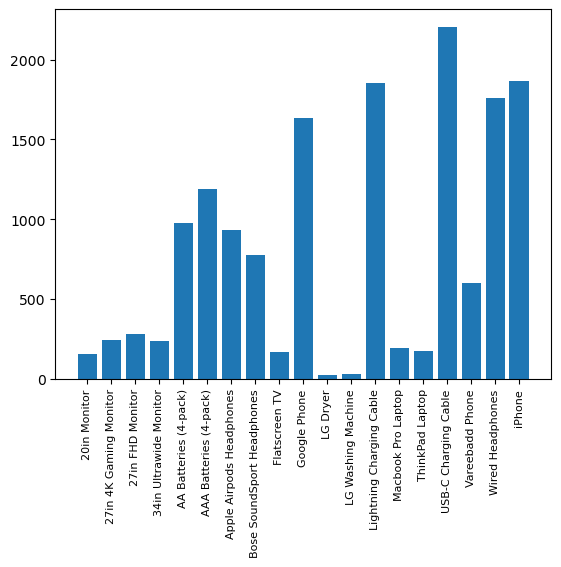

In [44]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\jyoti\AppData\Local\Temp\ipykernel_8180\813013605.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = df.groupby('Product').mean()['Price Each']
C:\Users\jyoti\AppData\Local\Temp\ipykernel_8180\813013605.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\jyoti\AppData\Local\Temp\ipykernel_8180\813013605.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


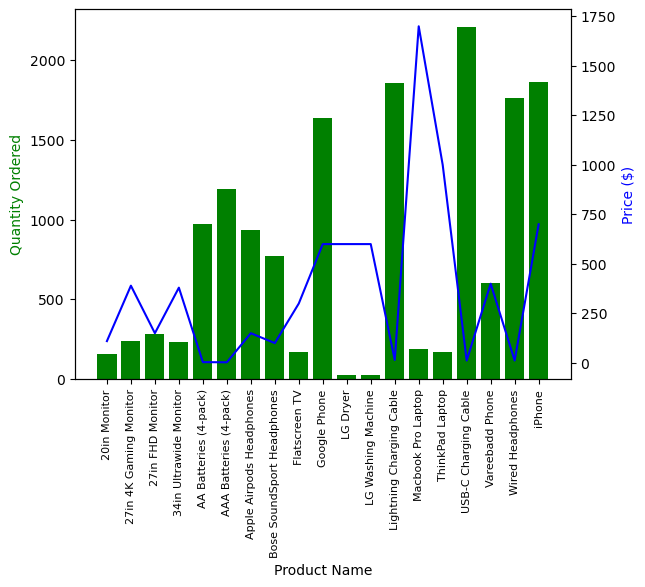

In [45]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

<h2 align="center" style="color:red">END OF PROJECT</h2>